# Assignment 2- Building ANN with California Housing Prices

In [1]:
#I used stackoverflow and kaggle to help with debugging errors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler # used for scaling of data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking
from keras.layers.recurrent import LSTM
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
import seaborn as sns
#from pandas.plotting import scatter_matrix

Using TensorFlow backend.


## Read in the training data

In [2]:
df = pd.read_csv('cali-house-prices.csv', index_col = 0)

In [3]:
print('the number of rows and colums are'+str(df.shape))

print('\nthe columns are - \n')
[print(i,end='.\t\n') for i in df.columns.values]

the number of rows and colums are(20640, 10)

the columns are - 

longitude.	
latitude.	
housing_median_age.	
total_rooms.	
total_bedrooms.	
population.	
households.	
median_income.	
median_house_value.	
ocean_proximity.	


[None, None, None, None, None, None, None, None, None, None]

In [4]:
df.shape

(20640, 10)

## Exploratory Analysis

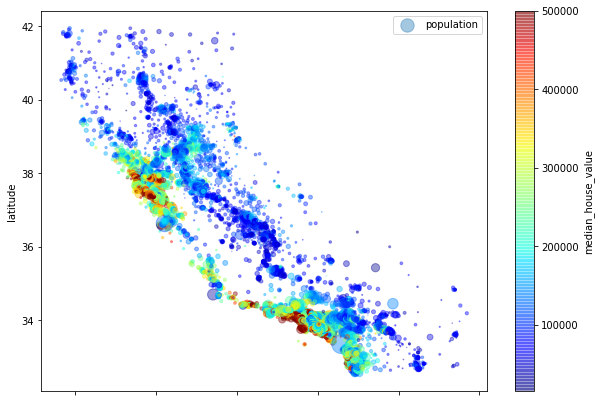

In [5]:
df.plot(kind="scatter", x="longitude", y="latitude",
    s=df['population']/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

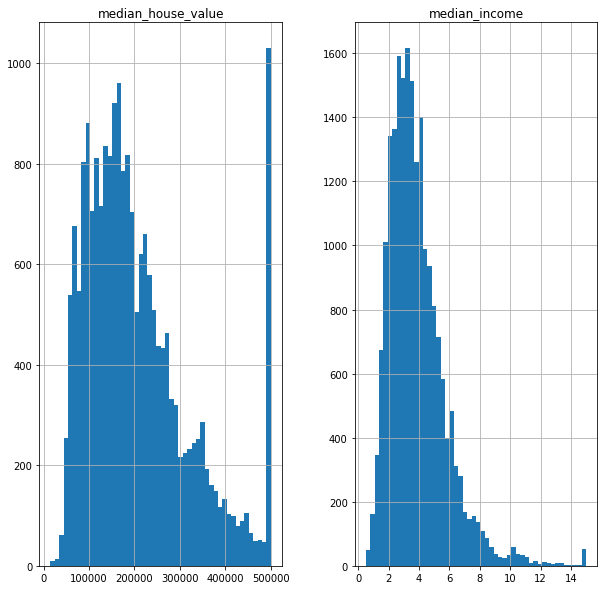

In [7]:
df[['median_house_value','median_income']].hist(bins=50,figsize=(10,10)) #custom histogram with selected bin size as 50
plt.show()

### Histogram depicting all feature_columns sorted using bins

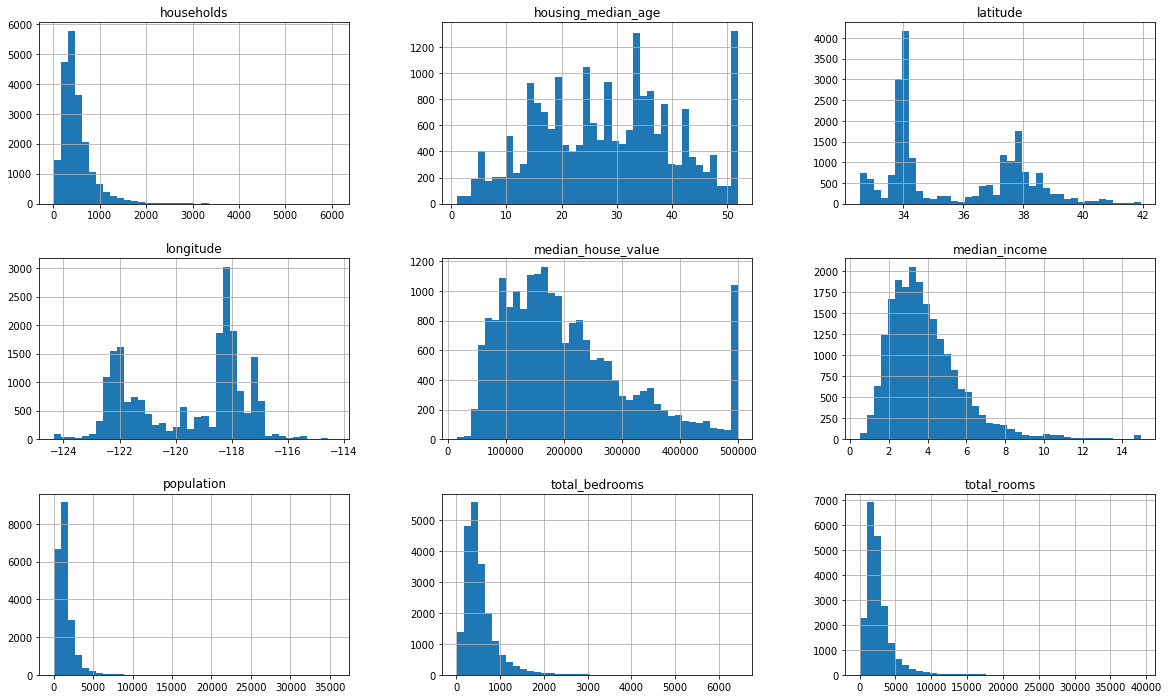

In [8]:
df.hist(bins = 40, figsize = (20, 12));

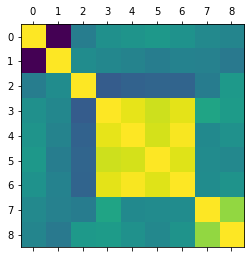

In [34]:
#sample correlation matrix to look at the hot spots in the dataset
plt.matshow(df.corr())

#### Dropping  the nan values from a specified column this time choosing total bedrooms were present with NaNs

In [9]:
df2 = df.dropna(subset=['total_bedrooms'])

In [10]:
df2.describe()
#cali =  df2['median_house_value']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Test/Train Split
### split dataset in the ration of 90:10
created a training and test set for both X and Y parameters and then split in the ratio of 90:10 and scaled the values to tranform for training the model

In [38]:
cols = ['longitude','latitude', 'housing_median_age', 'total_rooms', 'median_income',
        'total_bedrooms', 'population', 'households']
df_train = df[cols]
#making the dummy values
df_train = pd.get_dummies(df_train)
#filling NaNs with the mean of the column
df_train = df.fillna(df_train.mean())
#standarize the scale of the data
scale = StandardScaler()
X_train = df_train[['longitude','latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income']]
#X_train = scale.fit_transform(X_train)
#y is the median house value column becauae thats our prediction
y = df_train['median_house_value'].values
seed = 7
np.random.seed(seed)
#split dataset into the ratio 90 : 10
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.10, random_state=1)

Below is the function created using to set up all the parameters of this model, for this model im using sgd as the optimizer and using a mean_squared_logarithmic_error for the loss function as it worked the best for this dataset

In [39]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation= 'relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    #compling the model
    model.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error',
              metrics =[metrics.msle])
    return model

In [40]:
#model to plot history to visualize over time loss and error
history = create_model().fit(X_train, y_train, batch_size=256, epochs=30, validation_data=(X_test, y_test))

Train on 18576 samples, validate on 2064 samples
Epoch 1/30
18576/18576 [==============================] - 1s 43us/step - loss: 113.6201 - mean_squared_logarithmic_error: 113.6201 - val_loss: 38.6920 - val_mean_squared_logarithmic_error: 38.6920
Epoch 2/30
18576/18576 [==============================] - 0s 7us/step - loss: 30.7516 - mean_squared_logarithmic_error: 30.7516 - val_loss: 23.0678 - val_mean_squared_logarithmic_error: 23.0678
Epoch 3/30
18576/18576 [==============================] - 0s 7us/step - loss: 16.1079 - mean_squared_logarithmic_error: 16.1079 - val_loss: 11.2295 - val_mean_squared_logarithmic_error: 11.2295
Epoch 4/30
18576/18576 [==============================] - 0s 7us/step - loss: 8.9718 - mean_squared_logarithmic_error: 8.9718 - val_loss: 7.0786 - val_mean_squared_logarithmic_error: 7.0786
Epoch 5/30
18576/18576 [==============================] - 0s 7us/step - loss: 5.8599 - mean_squared_logarithmic_error: 5.8599 - val_loss: 4.7844 - val_mean_squared_logarithmic_

In [33]:
reg= create_model()
reg.fit(X_train, y_train, epochs = 30 )

Epoch 1/30
18576/18576 [==============================] - 1s 66us/step - loss: 8.1158 - mean_squared_logarithmic_error: 8.1158
Epoch 2/30
18576/18576 [==============================] - 1s 41us/step - loss: 0.6528 - mean_squared_logarithmic_error: 0.6528
Epoch 3/30
18576/18576 [==============================] - 1s 40us/step - loss: 0.5649 - mean_squared_logarithmic_error: 0.5649
Epoch 4/30
18576/18576 [==============================] - 1s 40us/step - loss: 0.3975 - mean_squared_logarithmic_error: 0.3975
Epoch 5/30
18576/18576 [==============================] - 1s 42us/step - loss: 0.2981 - mean_squared_logarithmic_error: 0.2981
Epoch 6/30
18576/18576 [==============================] - 1s 40us/step - loss: 0.2764 - mean_squared_logarithmic_error: 0.2764
Epoch 7/30
18576/18576 [==============================] - 1s 39us/step - loss: 0.2671 - mean_squared_logarithmic_error: 0.2671
Epoch 8/30
18576/18576 [==============================] - 1s 40us/step - loss: 0.2592 - mean_squared_logarithmi

### After training the model I printed and summarized the history to visualize the error and loss comparsion
to show the comparasion between model error and model loss between training and the test set 

dict_keys(['val_loss', 'val_mean_squared_logarithmic_error', 'loss', 'mean_squared_logarithmic_error'])


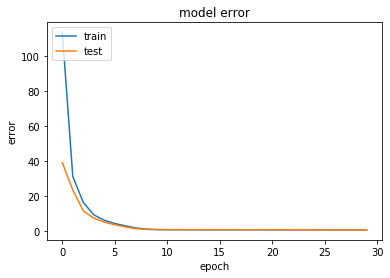

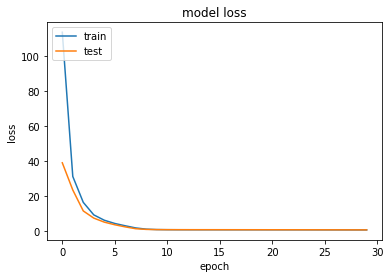

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for error
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])
plt.title('model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()